In [5]:
#import all dependencies

import pandas as pd 
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
#Considering four major cryptocurrencies :
# a. Bitcoin - BTC
# b. Litecoin - LTC
# c. Ethereum - ETH
# d. Ripple - XRP

# Considering two exchanges'Bitstamp' and 'Kraken'. 
# Bitstamp is a bitcoin exchange based in Luxembourg. It allows trading between USD currency and bitcoin cryptocurrency
# Kraken is a US-based cryptocurrency exchange operating in Canada,the EU,Japan,and the US, and the world's largest bitcoin exchange in euro volume and liquidity

symbol = ['BTC','LTC','ETH','XRP']
to_symbol = 'USD'
all_exchange = ['Bitstamp','Kraken']
datetime_interval = 'day'

In [7]:
# Using https://min-api.cryptocompare.com/ to get the data
# We download daily data from the above site


# The cryptocompare api returns following columns:

#open, the price at which the period opened,
#high, the highest price reached during the period,
#low, the lowest price reached during the period,
#close, the price at which the period closed,
#volumefrom, the volume in the base currency that things are traded into,
#volumeto, the volume in the currency that is being traded.

def get_file(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)

# confirming if the datetime_interval entered is a supported format
def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals

    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    url_base = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (url_base, datetime_interval)

    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data

#Converting data to dataframe 
def convert_to_df(data):
    df = pd.io.json.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df

#Filtering out the empty datapoints from the dataframe
def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df

for from_symbol in symbol:
    for exchange in all_exchange:

        data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
        df = convert_to_df(data)
        df = filter_empty_datapoints(df)

        current_datetime = datetime.now().date().isoformat()
        filename = get_file(from_symbol, to_symbol, exchange, datetime_interval, current_datetime)
        print('Saving data to %s' % filename)
        df.to_csv(filename, index=False)

Filtering 696 empty datapoints
Saving data to BTC_USD_Bitstamp_day_2018-06-24.csv
Filtering 278 empty datapoints
Saving data to BTC_USD_Kraken_day_2018-06-24.csv
Filtering 1636 empty datapoints
Saving data to LTC_USD_Bitstamp_day_2018-06-24.csv
Filtering 296 empty datapoints
Saving data to LTC_USD_Kraken_day_2018-06-24.csv
Filtering 1773 empty datapoints
Saving data to ETH_USD_Bitstamp_day_2018-06-24.csv
Filtering 948 empty datapoints
Saving data to ETH_USD_Kraken_day_2018-06-24.csv
Filtering 1477 empty datapoints
Saving data to XRP_USD_Bitstamp_day_2018-06-24.csv
Filtering 1632 empty datapoints
Saving data to XRP_USD_Kraken_day_2018-06-24.csv


In [8]:
#Defining the function to read the stored datasets

def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change type from object to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

#df = read_dataset(filename)

In [9]:
#Reading the stored datasets

df_btc_bit = read_dataset(get_file('BTC', 'USD', 'Bitstamp', 'day', '2018-06-24'))
df_eth_bit = read_dataset(get_file('ETH', 'USD', 'Bitstamp', 'day', '2018-06-24'))
df_ltc_bit = read_dataset(get_file('LTC', 'USD', 'Bitstamp', 'day', '2018-06-24'))
df_xrp_bit = read_dataset(get_file('XRP', 'USD', 'Bitstamp', 'day', '2018-06-24'))

df_btc_kra = read_dataset(get_file('BTC', 'USD', 'Kraken', 'day', '2018-06-24'))
df_eth_kra = read_dataset(get_file('ETH', 'USD', 'Kraken', 'day', '2018-06-24'))
df_ltc_kra = read_dataset(get_file('LTC', 'USD', 'Kraken', 'day', '2018-06-24'))
df_xrp_kra = read_dataset(get_file('XRP', 'USD', 'Kraken', 'day', '2018-06-24'))

Reading data from BTC_USD_Bitstamp_day_2018-06-24.csv
(1305, 6)
Reading data from ETH_USD_Bitstamp_day_2018-06-24.csv
(228, 6)
Reading data from LTC_USD_Bitstamp_day_2018-06-24.csv
(365, 6)
Reading data from XRP_USD_Bitstamp_day_2018-06-24.csv
(524, 6)
Reading data from BTC_USD_Kraken_day_2018-06-24.csv
(1723, 6)
Reading data from ETH_USD_Kraken_day_2018-06-24.csv
(1053, 6)
Reading data from LTC_USD_Kraken_day_2018-06-24.csv
(1705, 6)
Reading data from XRP_USD_Kraken_day_2018-06-24.csv
(369, 6)


In [10]:
df_btc_bit.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2014-11-28,360.57,381.34,363.59,376.28,8617.15,3220878.18
2014-11-29,372.25,386.60,376.42,376.72,7245.19,2746157.05
2014-11-30,373.32,381.99,376.57,373.34,3046.33,1145566.61
2014-12-01,373.03,382.31,376.40,378.39,6660.56,2520662.37
2014-12-02,375.23,382.86,378.39,379.25,6832.53,2593576.46


In [11]:
# To analyze the closing prices, which are prices at which the daily period closed,
# We merge BTC, ETH, LTC and XRP closing prices to a Dataframe to make analysis easier.
# We have two dataframes here, one each for Bitstamp and Kraken exchanges respectively

df_bit = pd.DataFrame({'BTC': df_btc_bit.close,
                   'ETH': df_eth_bit.close,
                   'LTC': df_ltc_bit.close,
                   'XRP': df_xrp_bit.close,})
df_bit.head()

df_kra = pd.DataFrame({'BTC': df_btc_kra.close,
                   'ETH': df_eth_kra.close,
                   'LTC': df_ltc_kra.close,
                   'XRP': df_xrp_kra.close,})
df_kra.head()

,BTC,ETH,LTC,XRP
datetime,,,,
2013-10-06,122.00,NaN,NaN,NaN
2013-10-07,123.61,NaN,NaN,NaN
2013-10-08,124.18,NaN,NaN,NaN
2013-10-09,123.84,NaN,NaN,NaN
2013-10-10,125.86,NaN,NaN,NaN


In [12]:
df_kra.describe()

,BTC,ETH,LTC,XRP
count,1723.000000,1053.000000,1705.000000,369.000000
mean,2092.504974,200.454516,31.121842,0.586636
std,3402.587493,289.885472,56.928151,0.489716
min,122.000000,0.420000,1.200000,0.146900
25%,372.000000,8.790000,3.480000,0.212000
50%,599.000000,13.250000,4.200000,0.489900
75%,1253.460000,313.650000,25.800000,0.806800
max,19356.900000,1358.820000,353.650000,2.780000


In [13]:
#Removing the NAN values from the data

data_bit = df_bit.dropna(thresh=4)
data_kra = df_kra.dropna(thresh=4)

Continuing the analysis with the Kraken dataset

In [14]:
data_bit.describe()

,BTC,ETH,LTC,XRP
count,228.000000,228.000000,228.000000,228.000000
mean,9872.612675,678.167588,159.914868,0.824653
std,3002.889245,233.319083,61.457010,0.502546
min,5870.370000,298.660000,58.700000,0.193100
25%,7728.945000,496.932500,118.052500,0.539900
50%,8920.750000,669.610000,148.570000,0.711150
75%,11177.587500,819.917500,194.387500,0.941950
max,19187.780000,1384.780000,357.120000,2.750000


In [15]:
# We have data for a year that is from 15-06-2017 to 24-06-2018

data_kra.head(10)
data_kra.tail(10)

,BTC,ETH,LTC,XRP
datetime,,,,
2018-06-15,6387.6,487.14,95.45,0.5330
2018-06-16,6481.4,497.00,97.26,0.5337
2018-06-17,6440.8,495.03,94.93,0.5259
2018-06-18,6706.6,517.45,98.78,0.5386
2018-06-19,6740.2,537.95,98.61,0.5492
2018-06-20,6755.4,535.99,97.99,0.5400
2018-06-21,6716.1,525.37,96.61,0.5332
2018-06-22,6055.5,462.28,84.77,0.4816
2018-06-23,6154.1,474.03,82.90,0.4899


In [16]:
data_kra.describe()

# Here we can see there is a large difference between the min and max values. 
# This means there has been a lot of fluctuations in the closing prices over time

# For example : The difference in BTC prices over a period of one year surged from $1907.24 to $19356.90

,BTC,ETH,LTC,XRP
count,369.000000,369.000000,369.000000,369.000000
mean,7640.425772,526.424580,118.483821,0.586636
std,3777.715906,264.943242,70.978538,0.489716
min,1907.240000,155.200000,37.900000,0.146900
25%,4363.100000,302.260000,54.420000,0.212000
50%,7485.600000,462.000000,107.070000,0.489900
75%,9526.200000,700.000000,161.640000,0.806800
max,19356.900000,1358.820000,353.650000,2.780000


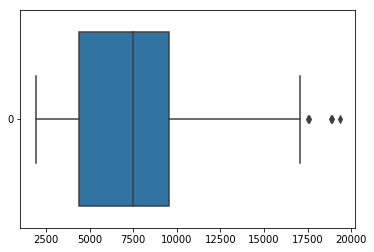

In [17]:
# We visualize the data with a boxplot.
# Considering the plot for one of the cryptocurrencies 'BTC'

import seaborn as sns

ax = sns.boxplot(data=data_kra['BTC'], orient="h")

# We see that the prices for bitcoin were mostly in the range of $4000 to $10000. 
# Values above $17500 are the outliers. We do not have many outliers in the data.

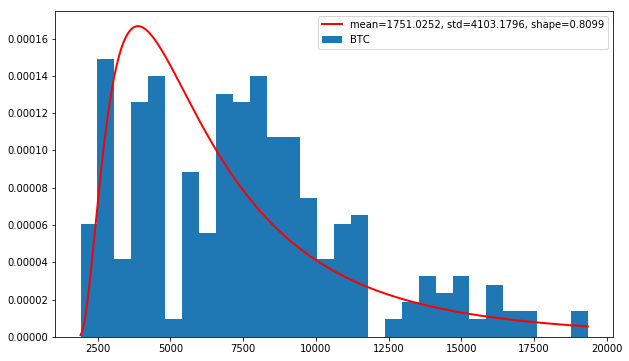

In [18]:
#On the chart below, we plot the distribution of BTC daily closing prices. 
#We also estimate parameters for log-normal distribution and plot estimated log-normal distribution with a red line.

#from scipy.stats import lognorm
#import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

values = data_kra['BTC']

shape, loc, scale = stats.lognorm.fit(values) 
x = np.linspace(values.min(), values.max(), len(values))
pdf = stats.lognorm.pdf(x, shape, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f, shape=%.4f' % (loc, scale, shape)

ax.hist(values, bins=30, normed=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')


The distribution is right-skewed distribution.

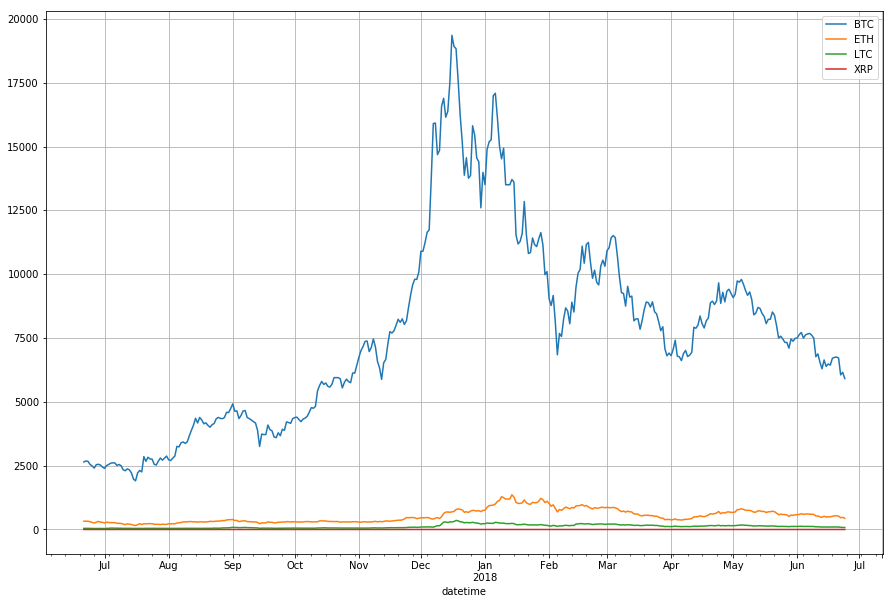

In [19]:
#Visualizing a comparison of the closing prices of the four cryptocurrencies over a period of one year

data_kra.plot(grid=True, figsize=(15, 10))

From the above graph we can see that there is a huge difference in the closing prices of bitcoin versus the other cryptocurrencies.
The prices for bitcoinn surged during Dec 2017 to Feb 2018. Whereas the prices for the other cryptocurrencies did not have much variation over this period.

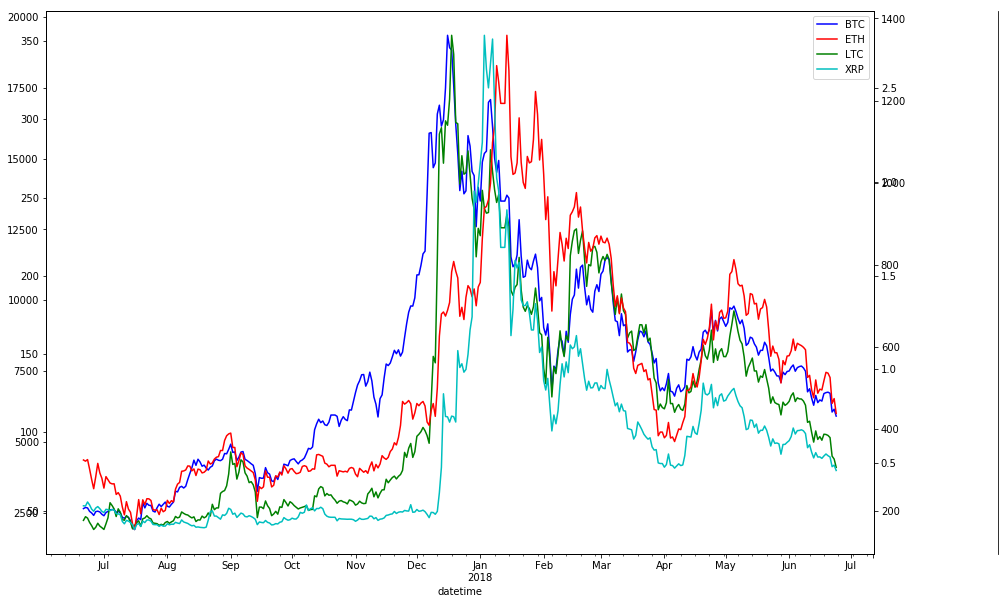

In [20]:
# Since there is huge difference in the prices of bitcoin versus other cryptocurrencies,
# We compare the relative pricing of these cryptocurrencies to better analyze them



fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx() #Creates a twin axis sharing the x axis
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

data_kra['BTC'].plot(ax=ax1, style='b-')
data_kra['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
data_kra['LTC'].plot(ax=ax2, style='g-')
data_kra['XRP'].plot(ax=ax2, style='c-', secondary_y=True)

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0],
            ax2.right_ax.get_lines()[0]],
           ['BTC', 'ETH', 'LTC','XRP'])

This plot shows that the closing prices for all the cryptocurrencies follow a similar pattern, i.e when the price of one increases, the others increase too. Similarly, when the price of one decreases, the others also decrease.

In [21]:
#Now, we apply the log returns equation to closing prices of cryptocurrencies:

# shift moves dates back by 1
data_kra_log = data_kra.apply(lambda x: np.log(x) - np.log(x.shift(1))) 

In [22]:
data_kra_log.head()

,BTC,ETH,LTC,XRP
datetime,,,,
2017-06-21,NaN,NaN,NaN,NaN
2017-06-22,0.015017,-0.008915,0.052128,-0.004036
2017-06-23,-0.006348,0.012054,-0.019507,0.076416
2017-06-24,-0.046244,-0.074439,-0.063742,-0.056037
2017-06-25,-0.022750,-0.086906,-0.049569,-0.084134


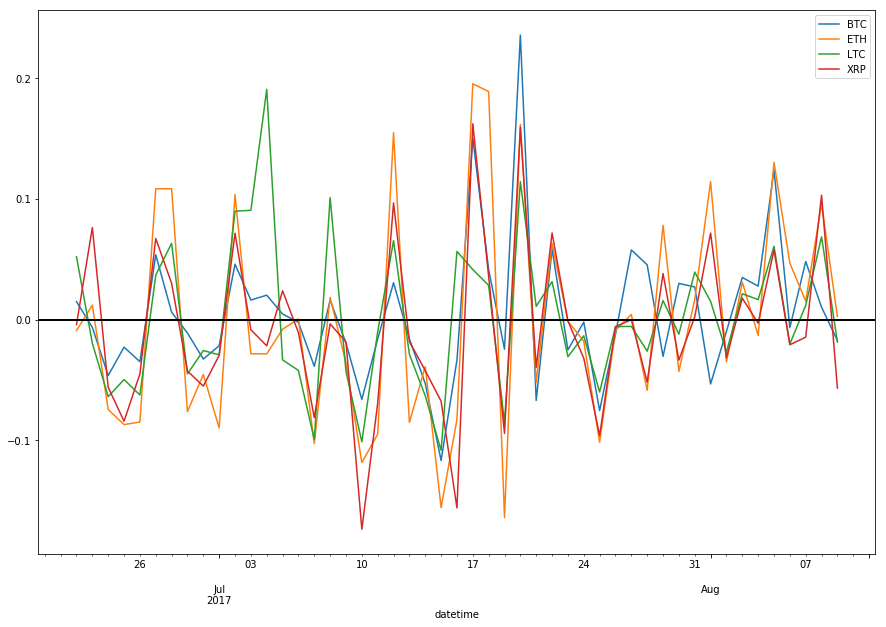

In [23]:
# We plot normalized changes of closing prices for the four cryptocurrencies
# These values give the percentage change

data_kra_log[:50].plot(figsize=(15, 10)).axhline(color='black', linewidth=2)

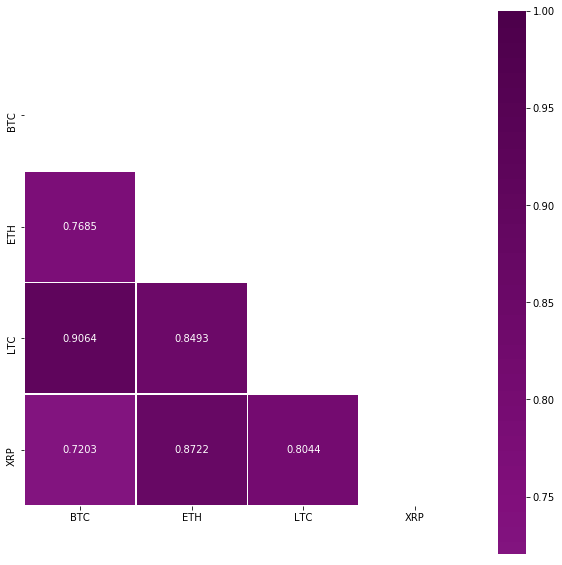

In [24]:
# We now measure the correlation between the closing prices of the cryptocurrencies.
# We use Pearson correlation for this purpose, since the dataset being used satisfies the assumptions for Pearson correlation
# It has a value between +1 and −1, where 1 denotes positive linear correlation, 0 denotes no linear correlation, and −1 denotes negative linear correlation.


import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr = data_kra.corr()

# Generate a mask for the upper triangle. 
# This is done since the correlation matrix is symmetric and we can thus show only one half of the triangle.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Drawing the heatmap
# linewidths : Add lines between each cell
# annot : Annotates each cell with the numeric value
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5, cmap="BuPu")

Reasons to use logged variables:

Statistically, since our variables are right-skewed then a measure such as correlation can be influenced a lot by one or a few cases at the high end on one or both variables (outliers, leverage points, influential points). Taking the log can help this by reducing or eliminating skew.

Hence we plot the correlation again using log values.

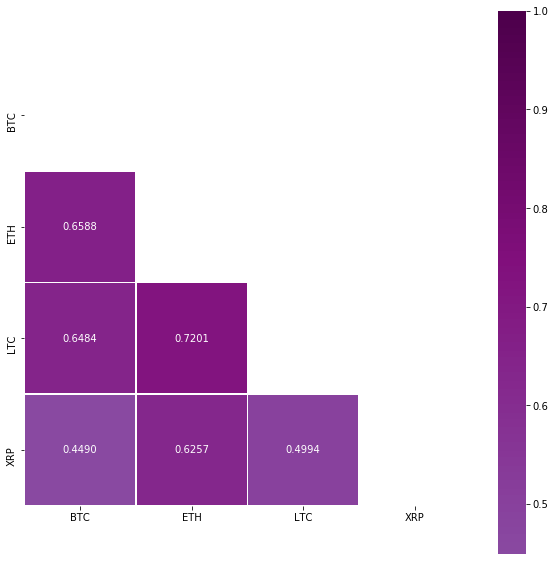

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
corr = data_kra_log.corr()

# Generate a mask for the upper triangle. 
# This is done since the correlation matrix is symmetric and we can therefore show only one half of the triangle.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Drawing the heatmap
# linewidths : Add lines between each cell
# annot : Annotates each cell with the numeric value
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5, cmap="BuPu")

From the heatmap we can conclude that, 
1. BTC and XRP have moderate positive correlation
2. BTC has strong positive correlation with LTC and ETH
3. ETH and LTC have the highest positive correlation out of all cryptocurrencies considered